### Student Information
Name: 林奕廷

Student ID: 113062513

GitHub ID: olgi9911

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [99]:
### Begin Assignment Here

# 1. Take Home Exercises

In [100]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [101]:
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

In [102]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

# construct dataframe from a list
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])

### **>>> Exercise 2 (take home):** 

In [103]:
#Answer here
print(X[:10]["text"])
print(X.loc[:10, ["text", "category_name"]])
print(X.query("category == 3 & index <= 10"))
print(X.sample(n=5))

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object
                                                 text           category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4   From: stanly@grok11.columbiasc

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [104]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [105]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [106]:
# Answer here
for i in range(len(NA_dict)):
    print(type(NA_df.loc[i, "missing_example"]))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


"missing_example" for index  2, 3, 5 are all string instead of NaN or None.

In [107]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [108]:
# Answer here
first_common_index = next((idx for idx in X.index if idx in X_sample.index), None)

print(X.loc[first_common_index])
print(X_sample.loc[first_common_index])

text             From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
category                                                         1
category_name                                        comp.graphics
Name: 1, dtype: object
text             From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
category                                                         1
category_name                                        comp.graphics
Name: 1, dtype: object


The index of the same record are also the same in X and X_sample. This is because the sample method does not sort the index.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

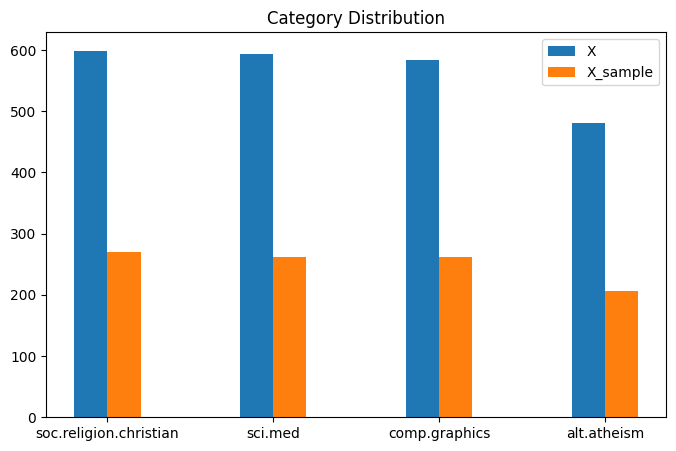

In [110]:
# Answer here
limit = max(X.category_name.value_counts()) + 50
bar_width = 0.2
index = np.arange(4)
index_sample = index + bar_width

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(index, X.category_name.value_counts(), bar_width, label="X")
ax.bar(index_sample, X_sample.category_name.value_counts(), bar_width, label="X_sample")
ax.set_xticks(index + (bar_width / 2))
ax.set_xticklabels(X.category_name.value_counts().index)
ax.set_title("Category Distribution")
ax.legend()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [112]:
# Answer here
print(f'Index = {X_counts[4, 0:100].toarray().nonzero()[1][1]}')
print(f'The word is "{count_vect.get_feature_names_out()[37]}".')

Index = 37
The word is "01".


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

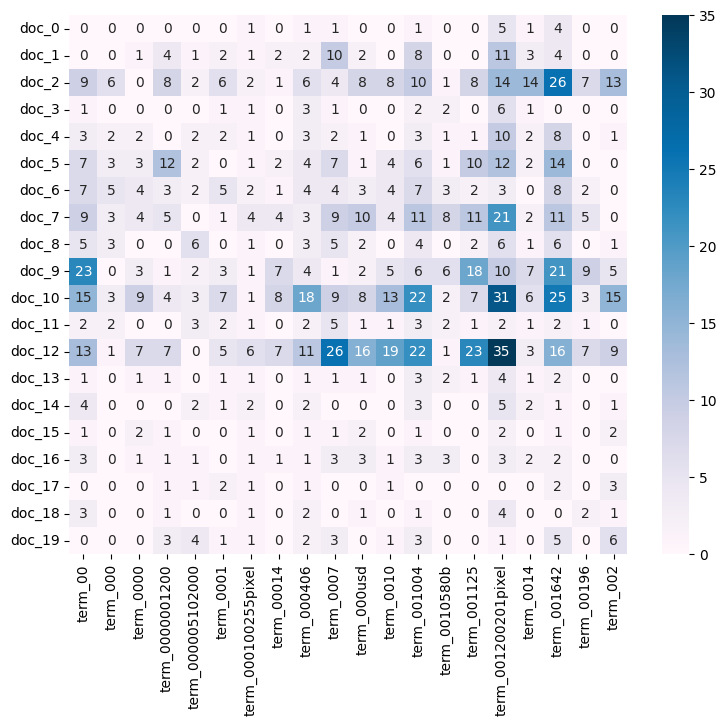

In [113]:
# Answer here
count_vect_top_freq = CountVectorizer(max_features=20) # count the top 20 features ordered by frequency
X_counts_top_freq = count_vect_top_freq.fit_transform(X.text)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts_top_freq[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuBu",
                 vmin=0, vmax=np.max(plot_z), annot=True)

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [114]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [115]:
# Answer here
import plotly.express as px
term_frequencies_df = pd.DataFrame(count_vect.get_feature_names_out()[:300], columns = ['term'])
term_frequencies_df['frequencies'] = term_frequencies[:300]

fig = px.bar(term_frequencies_df, x='term', y='frequencies')
fig.show()

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [116]:
# Answer here
fig = px.bar(term_frequencies_df.query("frequencies >= 10"), x='term', y='frequencies')
fig.show()

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [117]:
# Answer here
fig = px.bar(term_frequencies_df.sort_values(by=["frequencies"], ascending=False), x='term', y='frequencies')
fig.show()

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [118]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [119]:
# Answer here
term_frequencies_log_df = pd.DataFrame(count_vect.get_feature_names_out()[:300], columns = ['term'])
term_frequencies_log_df['frequencies'] = term_frequencies_log[:300]

fig = px.bar(term_frequencies_log_df.sort_values(by=["frequencies"], ascending=False), x='term', y='frequencies')
fig.show()

* **Scale**: The frequencies are scaled down after applying the log transformation, making it easier to compare significantly different frequencies.

* **Outliers**: Without log transformation, frequent words would dominate the distribution.

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [120]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [121]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category comp.graphics we filter the following words:
Bottom 1.0% words: 
initworld    1
jkpg         1
jiu1         1
jiu          1
jfreund      1
            ..
lab2         1
laaksone     1
l4v          1
l300         1
l14h11       1
Length: 137, dtype: int64
Top 5.0% words: 
40               27
distributed      27
open             27
multi            27
getting          27
               ... 
is             1751
and            2382
of             2470
to             2775
the            4537
Length: 687, dtype: int64

For category soc.religion.christian we filter the following words:
Bottom 1.0% words: 
disparate       1
expose          1
explosive       1
resisting       1
exploitation    1
               ..
fence           1
feminist        1
remarriage      1
remarried       1
remeber         1
Length: 138, dtype: int64
Top 5.0% words: 
pagan        36
claims       36
gave         36
parts        36
jr           37
          ...  
that       4393
and        4409
to        

000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

**Difference**: The bottom 1% words in each category are quite different.

**Similarity**: The top 5% words in each category contain common words, such as "is", "and", "to", "of", and "the". These can be considered stop words.

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

#### FAE Top-K

In [122]:
# Answer Here
from PAMI.frequentPattern.topk import FAE as alg

K=500
obj_fae = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=K)
obj_fae.mine()
Df = obj_fae.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(Df))) #print the total number of patterns
print('Runtime: ' + str(obj_fae.getRuntime())) #measure the runtime

Df

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.44194507598876953


Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  awful posts curious concerning proposed learn ...       12
496  posts curious concerning proposed learn forum ...       12
497  convenience posts curious concerning proposed ...       12
498  posts curious concerning proposed learn forum ...       12
499  posts curious concerning proposed learn forum ...       12

[500 rows x 2 columns]

In [123]:
# Answer Here
from PAMI.frequentPattern.topk import FAE as alg

K=1000
obj_fae = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=K)
obj_fae.mine()
Df = obj_fae.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(Df))) #print the total number of patterns
print('Runtime: ' + str(obj_fae.getRuntime())) #measure the runtime

Df

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 1.1682438850402832


Patterns  Support
0                                                maybe       26
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
995          favor proposed forum personally feel wate       12
996               proposed forum personally feel favor       12
997  convenience awful discussing posts curious con...       12
998  awful discussing posts curious concerning prop...       12
999  awful discussing posts curious concerning prop...       12

[1000 rows x 2 columns]

In [124]:
# Answer Here
from PAMI.frequentPattern.topk import FAE as alg

K=1500
obj_fae = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=K)
obj_fae.mine()
Df = obj_fae.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(Df))) #print the total number of patterns
print('Runtime: ' + str(obj_fae.getRuntime())) #measure the runtime

Df

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 2.2086451053619385


Patterns  Support
0                                                 maybe       26
1                                                  life       24
2                                                 ideas       24
3                                                  feel       24
4                                                 tried       24
...                                                 ...      ...
1495  awful discussing favor proposed learn personal...       12
1496  discussing favor proposed learn personally fee...       12
1497  convenience discussing favor proposed learn pe...       12
1498  discussing favor proposed learn personally fee...       12
1499  discussing favor proposed learn personally fee...       12

[1500 rows x 2 columns]

The FPGrowth algorithm outputs over 33k of patterns wih minSup=9 in 0.06s, while the FAE Top-k outputs 1500 patterns in over 2 seconds. The FPGrowth is much faster.

Another difference is that the generated dataframe is in ascending order of support with FPGrowth, while it is in descending order with FAE Top-k algorithm.

These two algorithms are used differently with FPGrowth focuses on patterns that meet a min. support threshold, while FAE Top-k focuses on the top-k most frequent patterns.

#### MaxFPGrowth

In [125]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

minSup = 3
obj_maxfp = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj_maxfp.mine()
Df= obj_maxfp.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(Df))) #print the total number of patterns
print('Runtime: ' + str(obj_maxfp.getRuntime())) #measure the runtime

Df

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 7.776576995849609


Patterns  Support
0     due bytes responsible 000 opinion 640x480 rob ...        3
1                                                  bag         3
2                                          garbo uwasa         3
3             wrong 200 responsible 000 umn 480 640 tc         3
4                                responsible 000 essex         3
...                                                 ...      ...
6867                                    didn wondering         3
6868                             feel wrong personally         3
6869                                     wrong correct         3
6870                                      life correct         3
6871                                        maybe life         4

[6872 rows x 2 columns]

In [126]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

minSup = 6
obj_maxfp = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj_maxfp.mine()
Df= obj_maxfp.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(Df))) #print the total number of patterns
print('Runtime: ' + str(obj_maxfp.getRuntime())) #measure the runtime

Df

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.1037139892578125


Patterns  Support
0                              tim brock         6
1                                   face         6
2                                 pardon         6
3     removal silent assassin cellar tsa         6
4                               creative         6
...                                   ...      ...
1335                            feel apr         8
1336                                didn        22
1337                               wrong        23
1338                               tried        24
1339                               ideas        24

[1340 rows x 2 columns]

In [127]:
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

minSup = 9
obj_maxfp = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj_maxfp.mine()
Df= obj_maxfp.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(Df))) #print the total number of patterns
print('Runtime: ' + str(obj_maxfp.getRuntime())) #measure the runtime

Df

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.04457998275756836


Patterns  Support
0                    tim         9
1                 option         9
2          rumours 68070         9
3                   chip         9
4    rumours mcmains unt         9
..                    ...      ...
655                wrong        23
656                tried        24
657                ideas        24
658                 life        24
659                maybe        26

[660 rows x 2 columns]

The runtime of FPGrowth and MaxFPGrowth is similar as both mine the csv file with minSup=9 in around 0.06s.

However, the number of patterns is significantly different. FPGrowth outputs over 33k of patterns, while MaxFPGrowth only outputs 660 of them. 

The reason is that MaxFPGrowth only returns the maximal itemsets, so the result is much more concise. On the other hand, FPGrowth outputs all possible subsets, which provides a more complete and detailed view of the file.

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [128]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

In [129]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

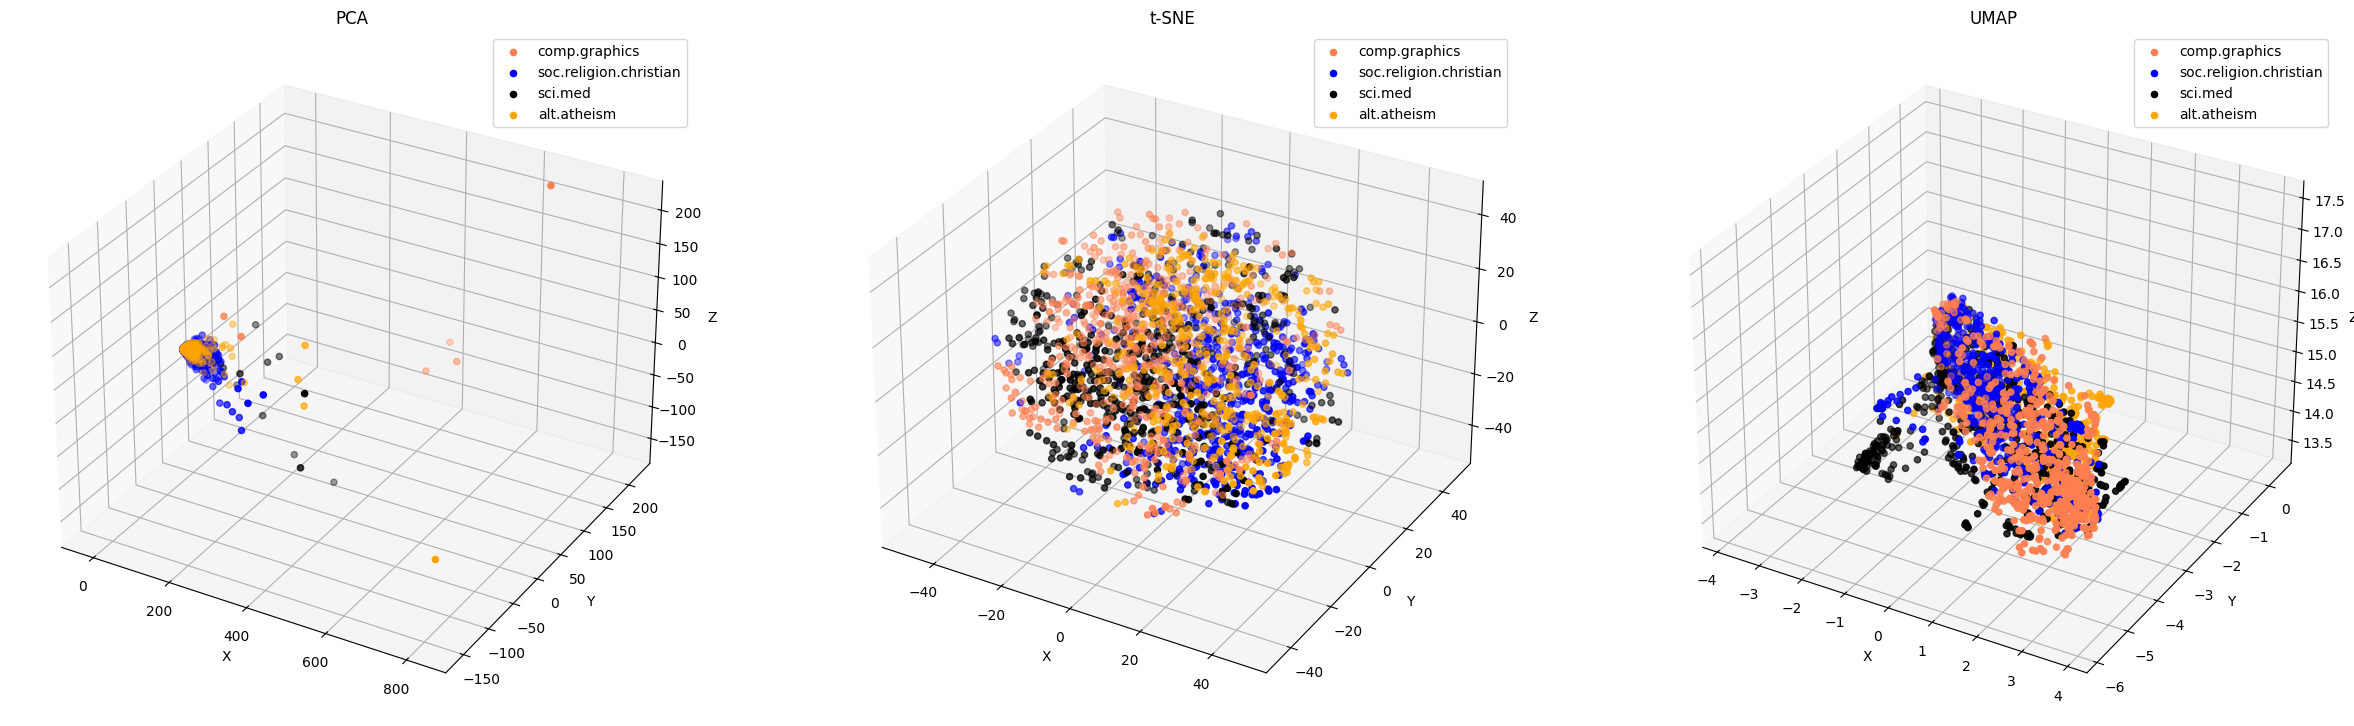

In [130]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
#fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, azim=-60, elev=30):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm_3d, 'PCA')
plot_scatter(axes[1], X_tsne_tdm_3d, 't-SNE')
plot_scatter(axes[2], X_umap_tdm_3d, 'UMAP')

plt.show()

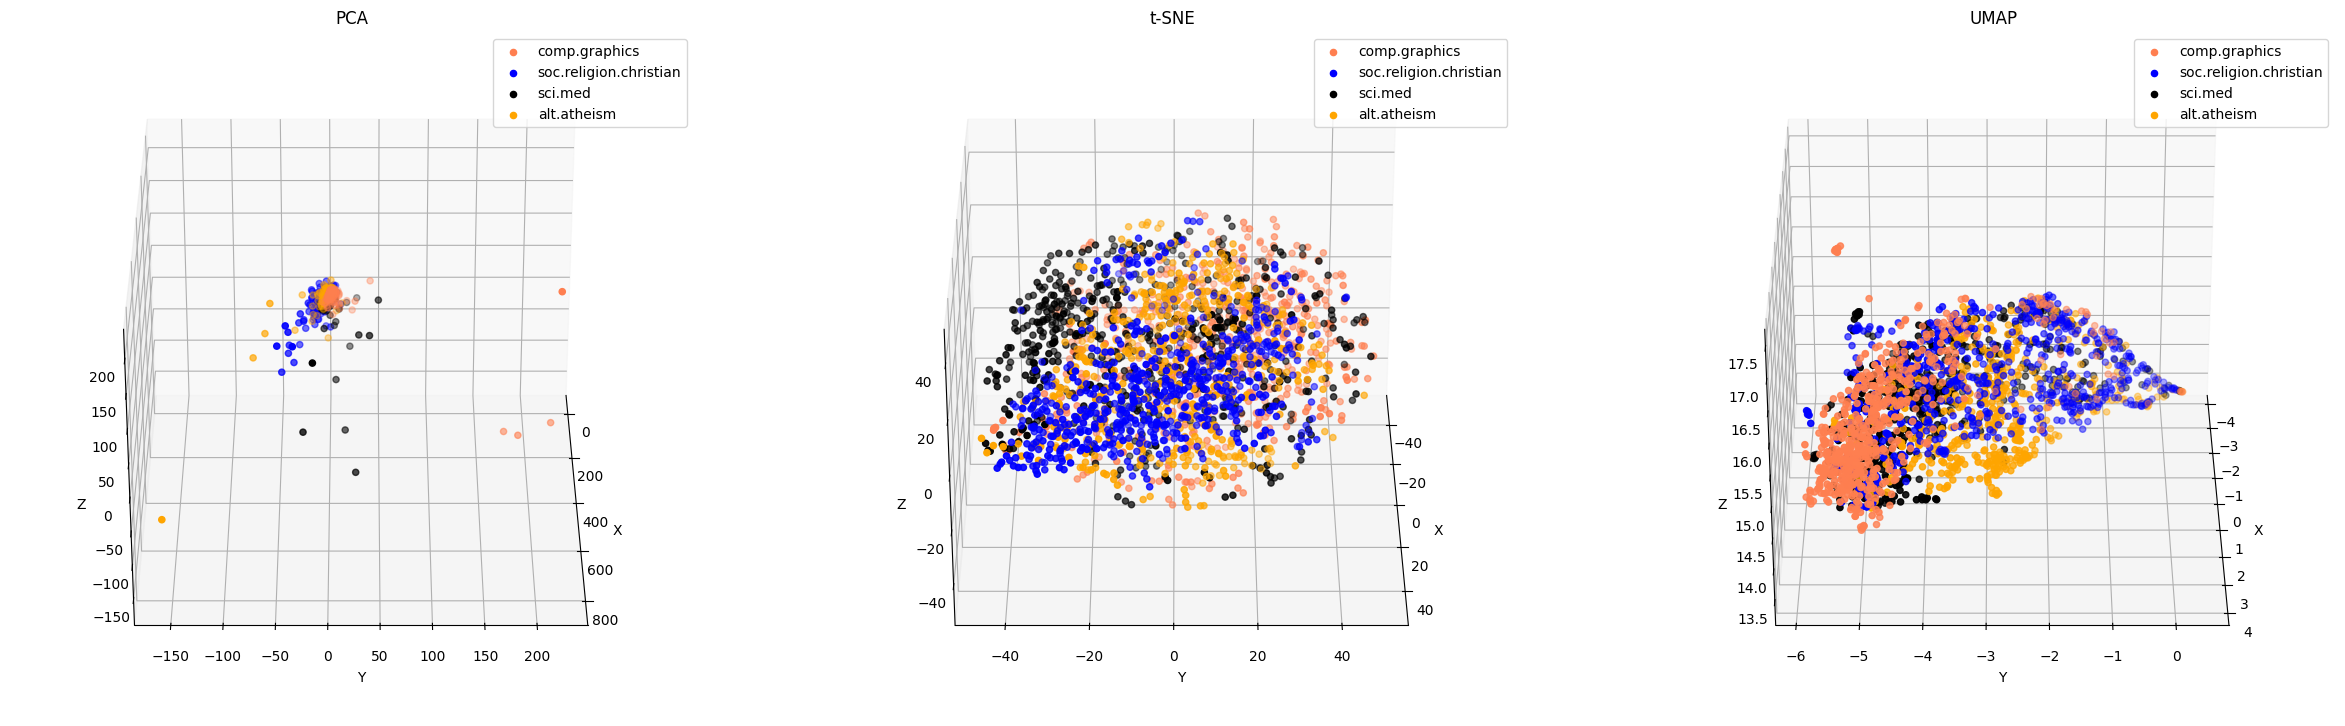

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm_3d, 'PCA', azim=0)
plot_scatter(axes[1], X_tsne_tdm_3d, 't-SNE', azim=0)
plot_scatter(axes[2], X_umap_tdm_3d, 'UMAP', azim=0)

plt.show()

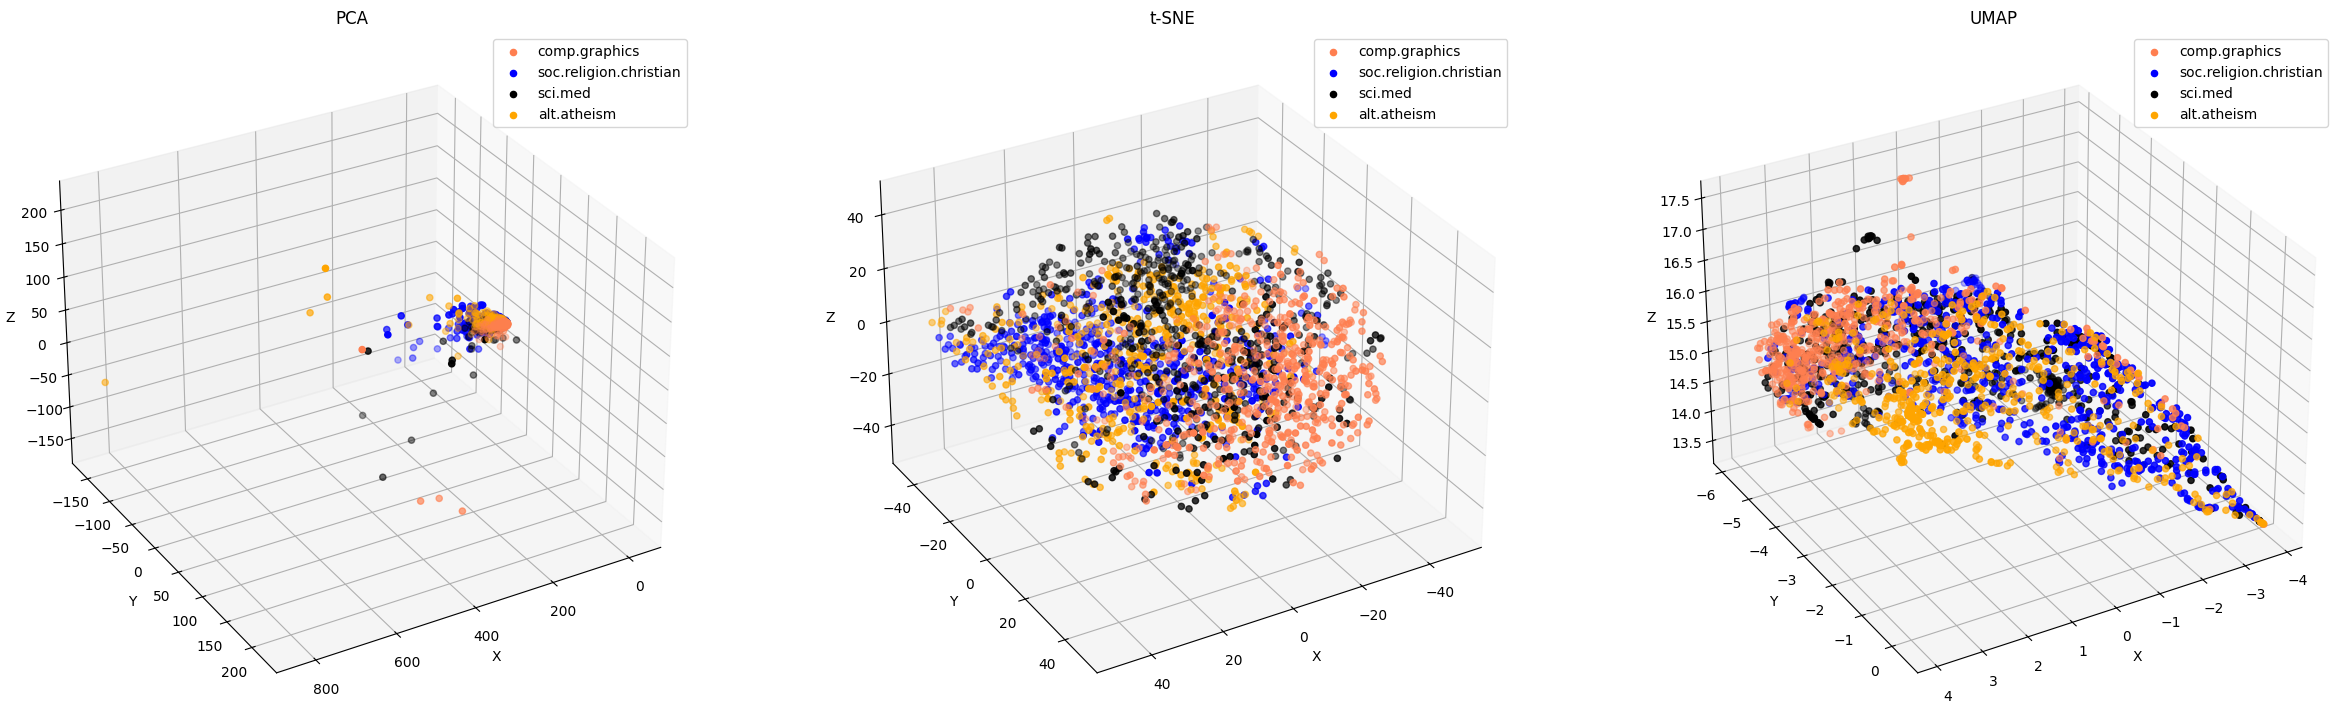

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm_3d, 'PCA', azim=60)
plot_scatter(axes[1], X_tsne_tdm_3d, 't-SNE', azim=60)
plot_scatter(axes[2], X_umap_tdm_3d, 'UMAP', azim=60)

plt.show()

* From the 2D PCA visualization above, the results are similar to the 2D version. Coral color points are more concentrated than blue one. Black and orange points are scattered.

* In the t-SNE graph, same as the 2D version, we observe a more scattered distribution, but still intermixing with all the categories. 

* And with the UMAP graph, the limits for the data seem pretty well defined, black color seem to have some points well differentiated from the other classes, but most of them remain intermixed.

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [133]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [134]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()

X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

Yes, it does work!

# 2. The New Dataset

## Data Transformation

In [135]:
df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df

sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

## Data Mining using Pandas

### Missing values

In [136]:
df.isnull()

sentiment  comment
0         False    False
1         False    False
2         False    False
3         False    False
4         False    False
...         ...      ...
1495      False    False
1496      False    False
1497      False    False
1498      False    False
1499      False    False

[1500 rows x 2 columns]

In [137]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

df.isnull().apply(lambda x: check_missing_values(x))

sentiment                             comment
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [138]:
df.dropna(inplace=True)

### Dealing with Duplicate Data

In [139]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [140]:
sum(df.duplicated())

1

In [141]:
df.drop_duplicates(keep="first", inplace=True) # keep the first record
len(df)

1499

## Data Preprocessing

### Sampling

In [142]:
df_sample = df.sample(n=1000)
len(df_sample)


1000

In [143]:
df_sample[0:4]

sentiment                                            comment
688       nostalgia  So beautiful and reminds me of my sister becau...
1219      nostalgia  Every party when we were young..we played this...
303   not nostalgia  Thank you so much for sharing this. One of my ...
1151  not nostalgia  the more I listen to this, the more depressed ...

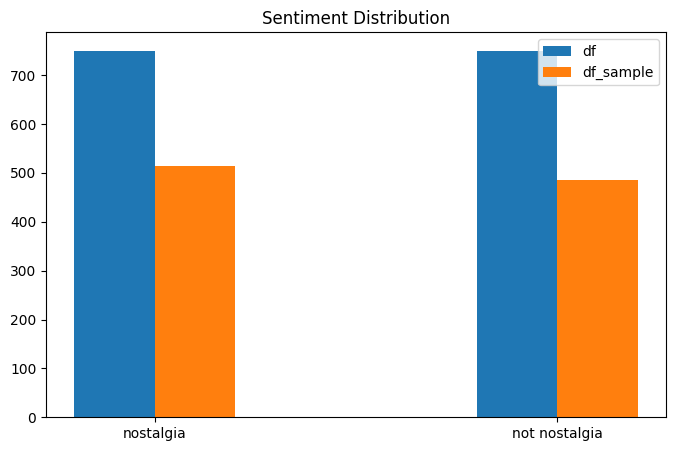

In [144]:
# Answer here
limit = max(df.sentiment.value_counts()) + 50
bar_width = 0.2
index = np.arange(2)  # Adjusted for the number of unique sentiments
index_sample = index + bar_width

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(index, df.sentiment.value_counts(), bar_width, label="df")
ax.bar(index_sample, df_sample.sentiment.value_counts(), bar_width, label="df_sample")
ax.set_xticks(index + (bar_width / 2))
ax.set_xticklabels(df.sentiment.value_counts().index)
ax.set_title("Sentiment Distribution")
ax.legend(loc='upper right')


### Feature Creation

In [145]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/Oscar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [146]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

df['unigrams'] = df['comment'].apply(lambda x: tokenize_text(x))

In [147]:
df[0:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

### Feature Subset Selection

In [148]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix

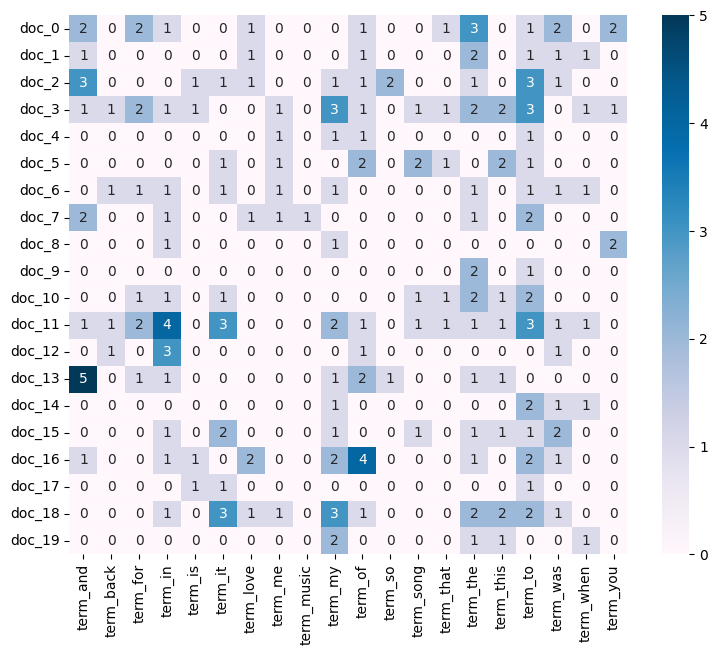

In [149]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_top_freq = CountVectorizer(max_features=20) # count the top 20 features ordered by frequency
df_counts_top_freq = count_vect_top_freq.fit_transform(df.comment)

plot_x = ["term_"+str(i) for i in count_vect_top_freq.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts_top_freq[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuBu",
                 vmin=0, vmax=np.max(plot_z), annot=True)

### Attribute Transformation / Aggregation

In [150]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [151]:
import plotly.express as px
term_frequencies_df = pd.DataFrame(count_vect.get_feature_names_out(), columns = ['term'])
term_frequencies_df['frequencies'] = term_frequencies

fig = px.bar(term_frequencies_df.query("frequencies >= 10"), x='term', y='frequencies')
fig.show()

In [152]:
fig = px.bar(term_frequencies_df.sort_values(by=["frequencies"], ascending=False)[:50], x='term', y='frequencies')
fig.show()

#### Finding Frequent Patterns

In [153]:
# Create separate DataFrames for each sentiment
sentiments = df['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vectorizer = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vectorizer.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vectorizer.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
filtered_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])


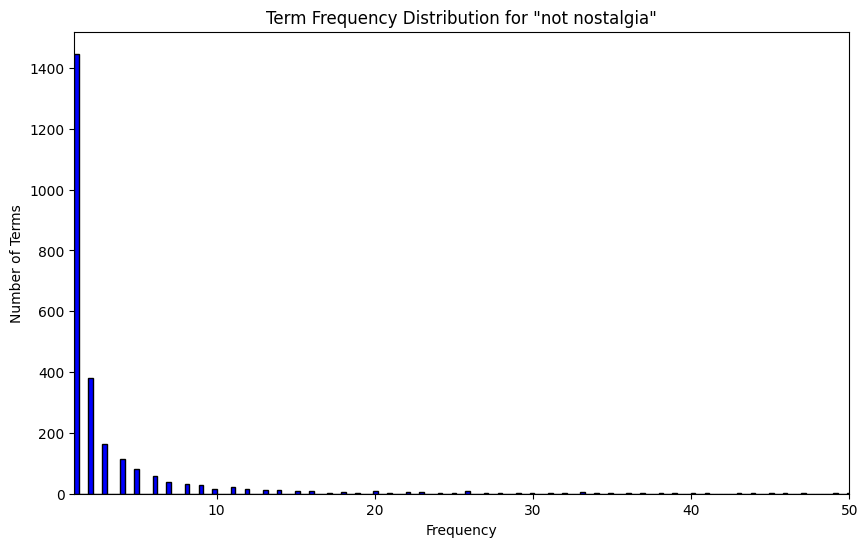

In [154]:
 # Sum over all documents to get total frequency for each word
sentiment_number=0
word_counts = filtered_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Calculate the interquartile range (IQR)
IQR = np.percentile(word_counts, 75) - np.percentile(word_counts, 25)

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * IQR / np.cbrt(len(word_counts))

# Calculate the number of bins
num_bins = int((word_counts.max() - word_counts.min()) / bin_width)

# Visualize the frequency distribution with the calculated number of bins
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=num_bins, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for "{sentiments[sentiment_number]}"')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 50)
plt.show()

In [155]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')  # Print the bottom percentage words
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')  # Print the top percentage words
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filtered_term_document_dfs[sentiment])


For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row       

In [156]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


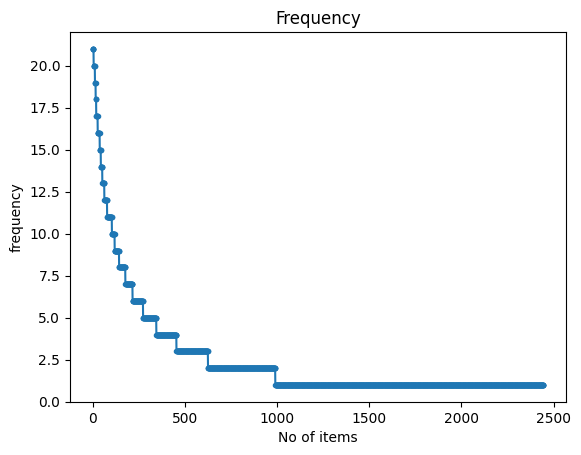

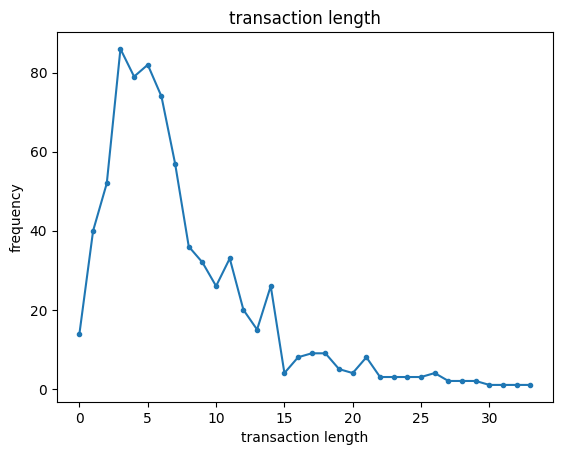

In [157]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


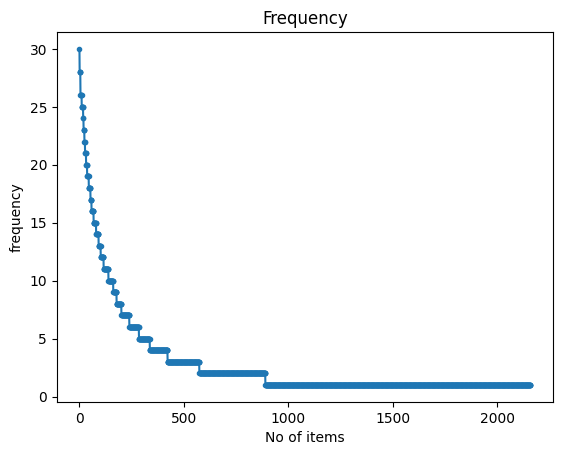

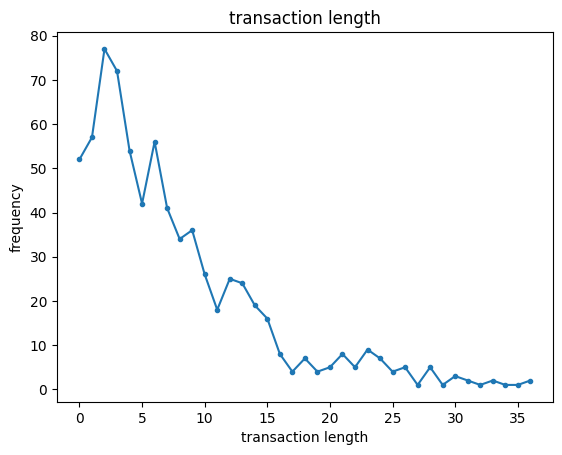

In [158]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [159]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 5
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia = obj1.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 355
Runtime: 0.0063931941986083984


In [160]:
obj1.save("freq_patterns_not_nostalgia_minSup5.txt")
frequentPatternsDF_not_nostalgia

Patterns  Support
0       leave        5
1      number        5
2      father        5
3    remember        5
4         100        5
..        ...      ...
350     every       21
351     loved       21
352   classic       21
353      them       21
354    lyrics       21

[355 rows x 2 columns]

In [161]:
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia = obj2.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 364
Runtime: 0.0077321529388427734


In [162]:
obj2.save("freq_patterns_nostalgia_minSup5.txt")
frequentPatternsDF_nostalgia

Patterns  Support
0       angel        5
1        town        5
2    everyday        5
3        able        5
4     married        5
..        ...      ...
359      ever       28
360     would       28
361      will       28
362        go       28
363  favorite       30

[364 rows x 2 columns]

In [163]:
# We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for pattern_df in dfs:
    for pattern in pattern_df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(pattern_df) for pattern_df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for pattern_df in dfs:
    filtered_df = pattern_df[pattern_df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")


    Patterns  Support
382     will       28
381    would       28
380     ever       28
378     wish       26
377       or       26
..       ...      ...
1     number        5
192     took        5
193    weeks        5
194     lane        5
191   senior        5

[383 rows x 2 columns]
Number of patterns discarded: 336


In [164]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # df['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  lane memory  town  \
0      0    0    0   0   0    0    0   0     0   0  ...            0     0   
1      0    0    0   0   0    0    0   0     0   0  ...            0     0   
2      0    0    0   0   0    0    0   0     0   0  ...            0     1   
3      0    0    0   0   0    0    0   0     0   0  ...            0     0   
4      0    0    0   0   0    0    0   0     0   0  ...            0     0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...          ...   ...   
1495   0    0    0   0   0    0    0   0     0   0  ...            0     0   
1496   0    0    0   0   0    0    0   0     0   0  ...            0     0   
1497   0    0    0   0   0    0    0   0     0   0  ...            0     0   
1498   0    0    0   0   0    0    0   0     0   0  ...            0     0   
1499   0    0    0   0   0    0    0   0     0   0  ...            0     0   

      everyday  able  married  number  took  weeks  lane  senior  
0            0     0        0       0     0      0     0       0  
1            0     0        0       0     0      0     0       0  
2            0     0        0       0     0      0     0       0  
3            0     0        0       0     0      0     0       0  
4            1     0        0       0     0      0     0       0  
...        ...   ...      ...     ...   ...    ...   ...     ...  
1495         0     0        0       0     0      0     0       0  
1496         0     0        0       0     0      0     0       0  
1497         0     0        0       0     0      0     0       0  
1498         0     0        0       0     0      0     0       0  
1499         0     0        0       0     0      0     0       0  

[1499 rows x 4113 columns]

### Dimensionality Reduction

In [165]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

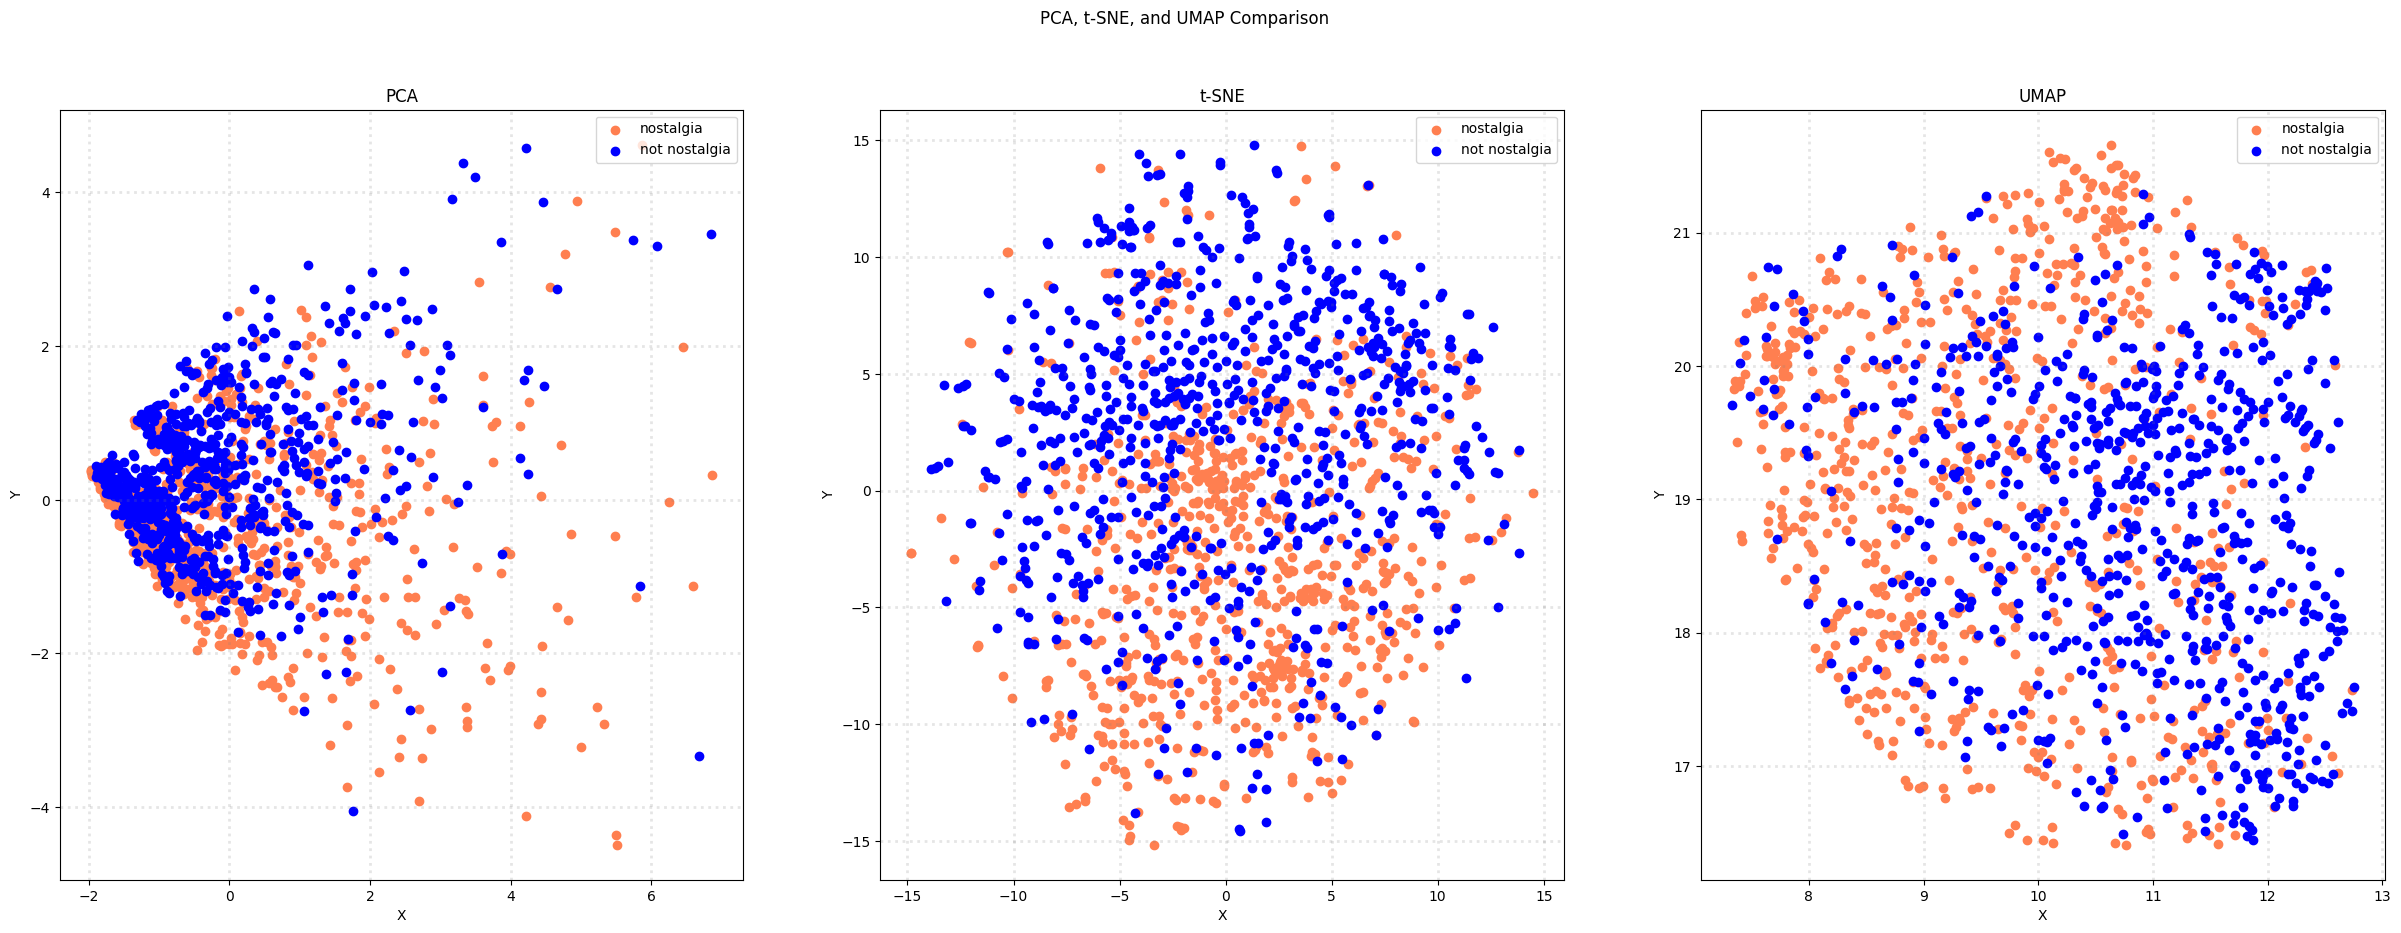

In [166]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = ['nostalgia', 'not nostalgia']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [167]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

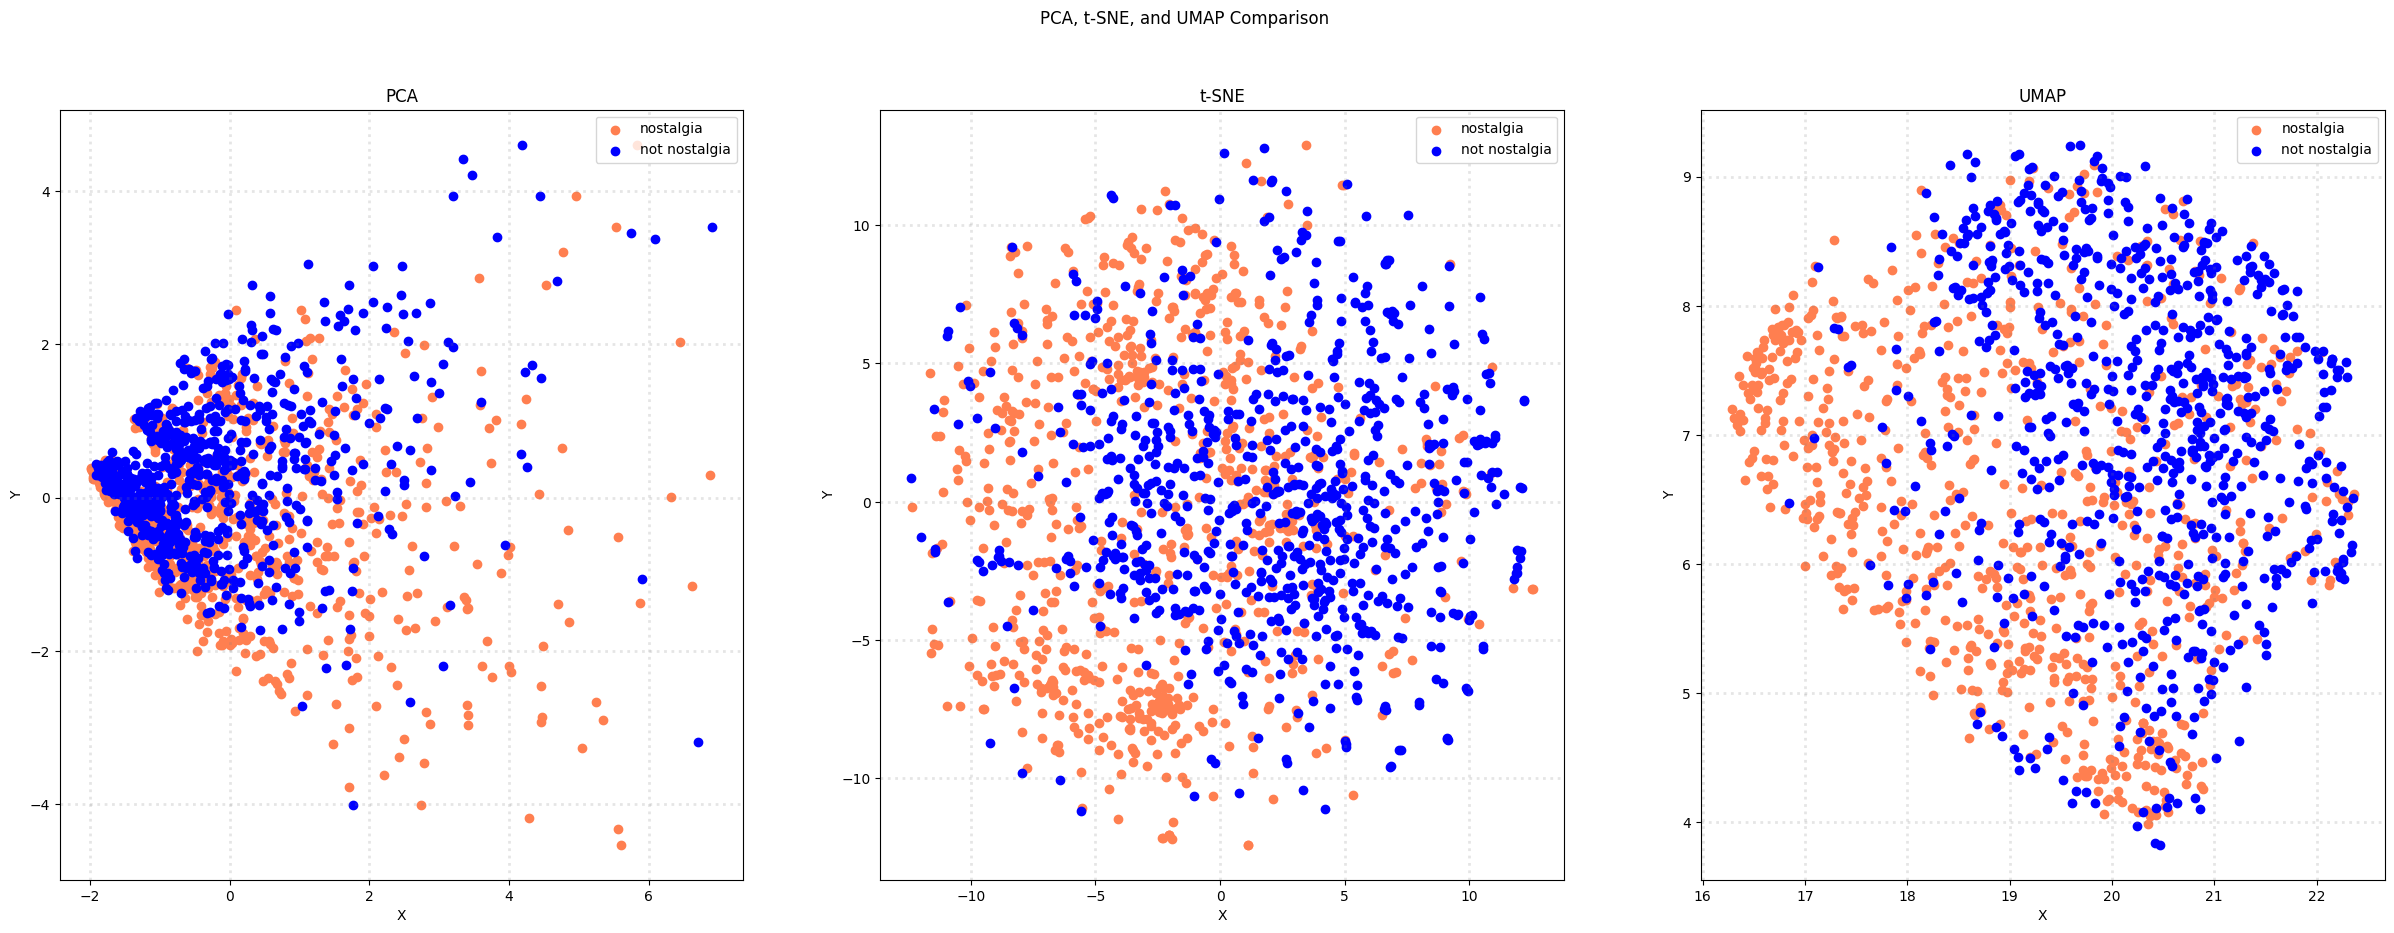

In [168]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = ['nostalgia', 'not nostalgia']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [169]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

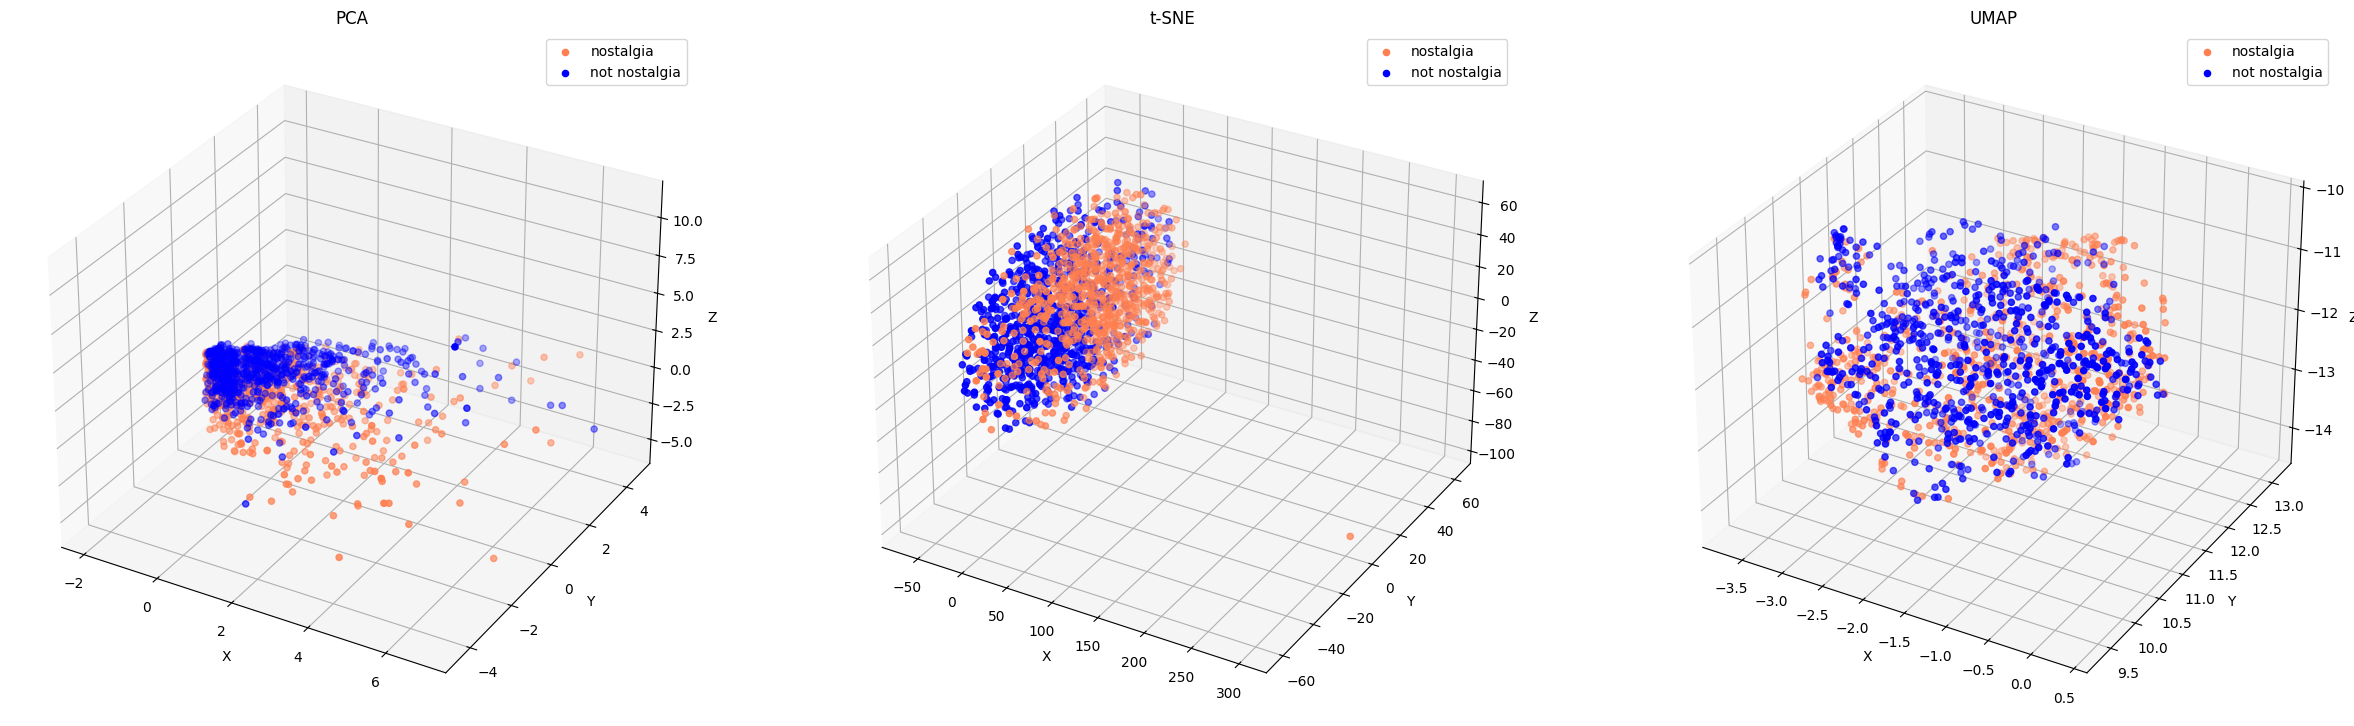

In [170]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = ['nostalgia', 'not nostalgia'] 

fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
#fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, azim=-60, elev=30):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        zs = X_reduced[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm_3d, 'PCA')
plot_scatter(axes[1], X_tsne_tdm_3d, 't-SNE')
plot_scatter(axes[2], X_umap_tdm_3d, 'UMAP')

plt.show()

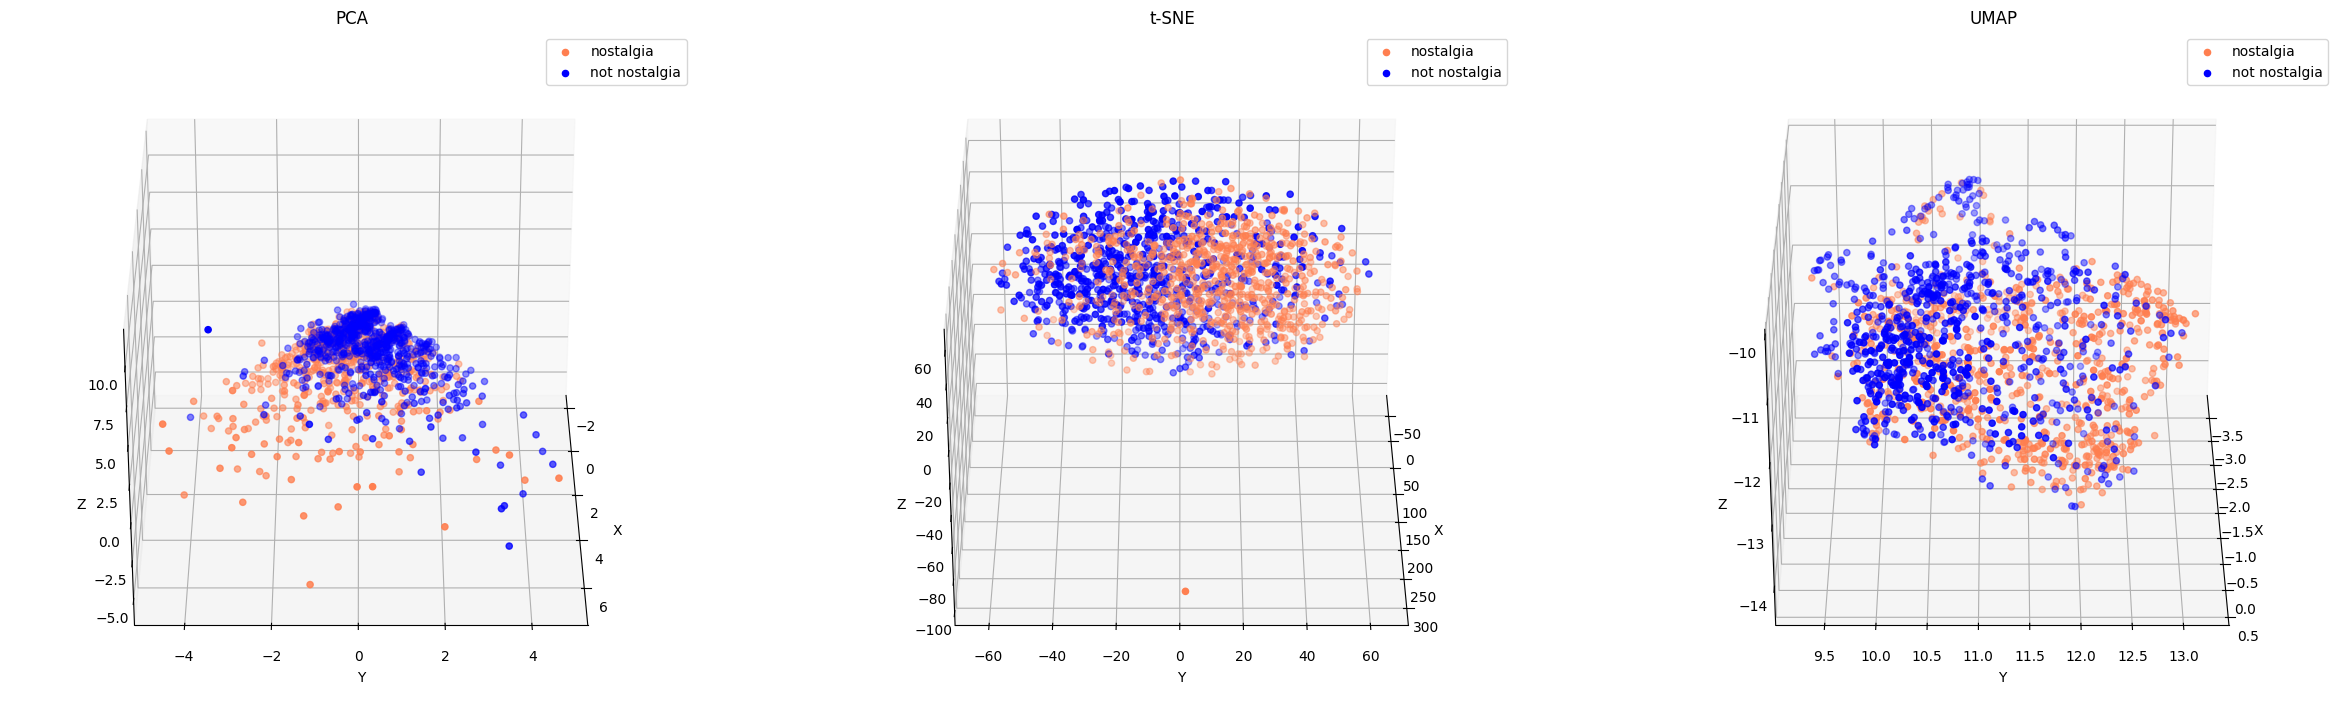

In [171]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm_3d, 'PCA', azim=0)
plot_scatter(axes[1], X_tsne_tdm_3d, 't-SNE', azim=0)
plot_scatter(axes[2], X_umap_tdm_3d, 'UMAP', azim=0)

plt.show()

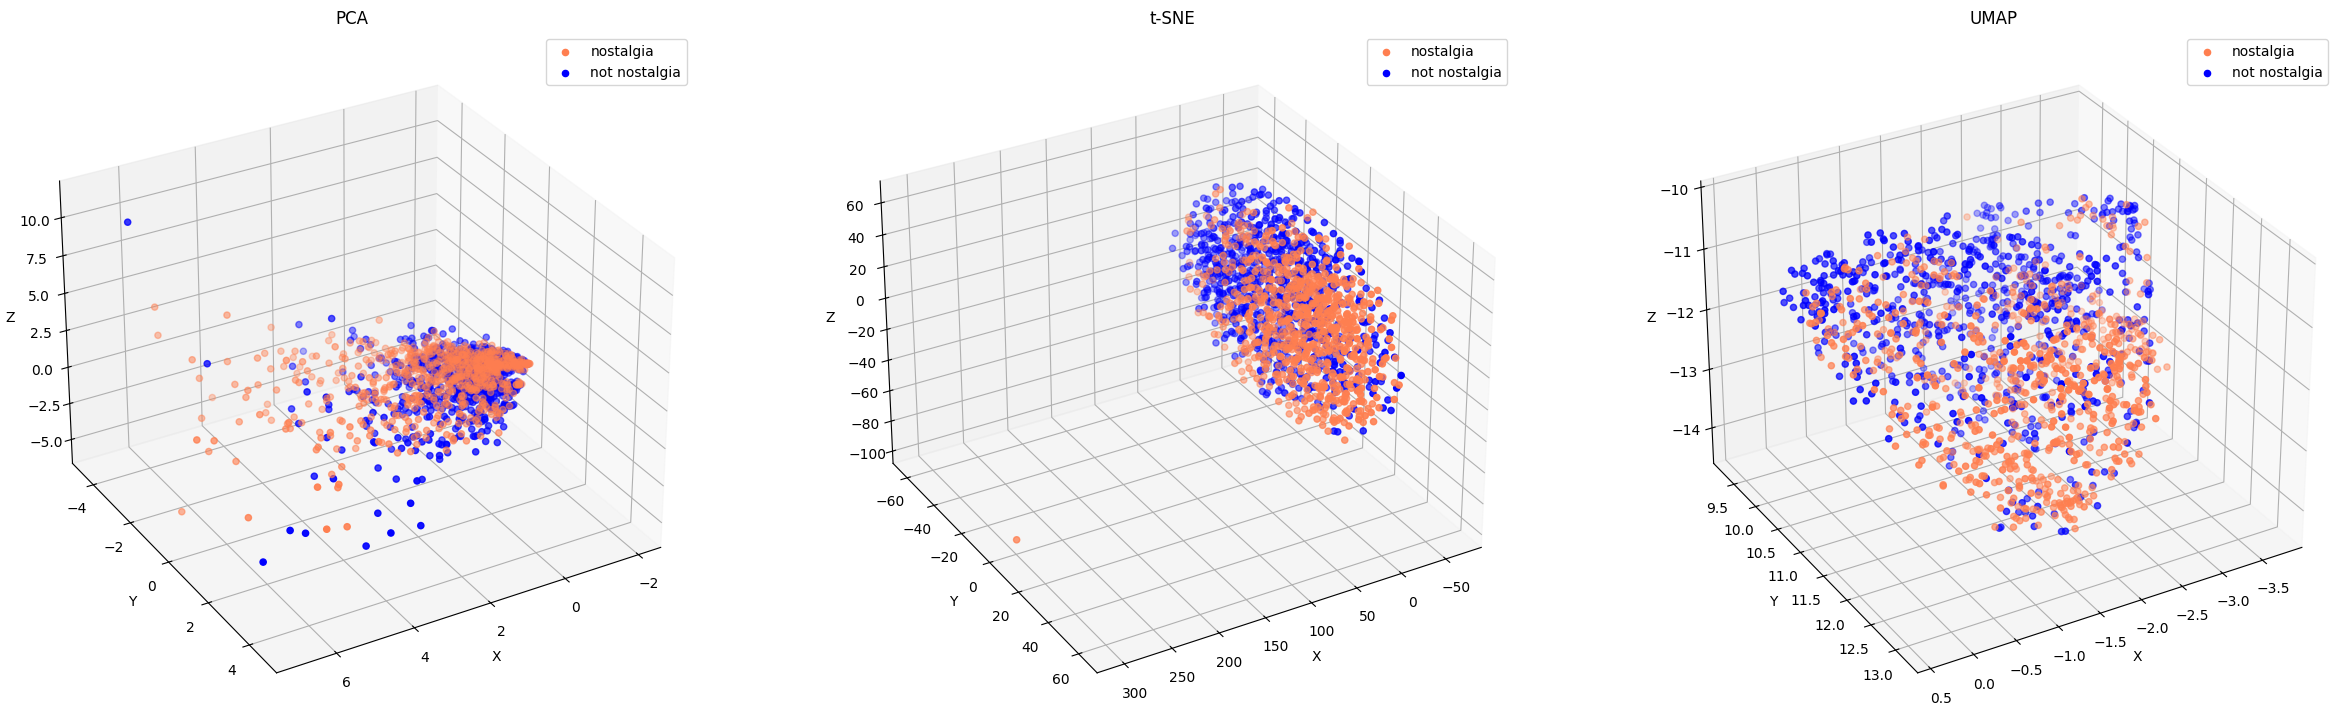

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm_3d, 'PCA', azim=60)
plot_scatter(axes[1], X_tsne_tdm_3d, 't-SNE', azim=60)
plot_scatter(axes[2], X_umap_tdm_3d, 'UMAP', azim=60)

plt.show()

### Discretization and Binarization

In [173]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [174]:
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()
df[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment  
0  {for, You, to, fan, now,, at, you, Thank, all,...           [1]  
1  {to, an, forgotten, I, singing, mist, Never, v...           [0]  
2  {Jesus, Always, to, no, at, comforting, sounds...           [0]  
3  {for, Nam, to, some, you, Thank, this, all, wh...           [1]  
4  {mum, me, to, his, songs, reminds, my, who, pl...           [0]  
5  {to, song., got, this, reminded, cry....becaus...           [0]  
6  {for, to, it, I, didn't, My, then,, Jim, how, ...           [0]  
7  {to, music., I, LISTENED, Jim, 71, now, feelin...           [0]  
8        {always, Wherever, you, heart, in, my, are}           [1]

## Data Exploration

In [175]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [176]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [177]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/66/_71r9fc11hgct526mhc2hv2w0000gp/T/ipykernel_56443/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/66/_71r9fc11hgct526mhc2hv2w0000gp/T/ipykernel_56443/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/66/_71r9fc11hgct526mhc2hv2w0000gp/T/ipykernel_56443/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/66/_71r9fc11hgct526mhc2hv2w0000gp/T/ipykernel_56443/452772485.py:17: Dep

## Data Classification

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

In [179]:
y_test.unique()

array(['nostalgia', 'not nostalgia'], dtype=object)

In [180]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=None, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



#### Model with the augmented data

In [181]:
#Model with the augmented data

X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

In [182]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=None, digits=4))

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8321    0.9571    0.8902       233
not nostalgia     0.9451    0.7926    0.8622       217

     accuracy                         0.8778       450
    macro avg     0.8886    0.8749    0.8762       450
 weighted avg     0.8866    0.8778    0.8767       450



# 3. 

### Generate meaningful **new data visualizations**.

#### Pie Chart

In [183]:
fig = px.pie(term_frequencies_df.sort_values(by=["frequencies"], ascending=False)[:30], values='frequencies', names='term', title='Term Frequencies')
fig.show()

#### Box

In [184]:
fig = px.box(term_frequencies_df.sort_values(by=["frequencies"], ascending=False)[:50], y='frequencies', title='Term Frequencies')
fig.show()

#### Violin

In [185]:
fig = px.violin(term_frequencies_df, y='frequencies', box=True, points='all', title='Term Frequencies')
fig.show()

#### ECDF

In [186]:
fig = px.ecdf(term_frequencies_df, x='frequencies', title='Term Frequencies')
fig.show()

### Generate **TF-IDF features** from the tokens of each text.

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
scores = vectorizer.fit_transform(df['comment'])

# Get the unique words (vocabulary) from the vectorizer
words = vectorizer.get_feature_names_out()

# Create a DataFrame where rows are documents and columns are words
tf_idf_df = pd.DataFrame(scores.toarray(), columns=words)

In [188]:
tf_idf_df

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1494    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1495    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1496    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1497    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1498    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1499 rows x 3730 columns]

In [189]:
print(f'The word with the max mean TF-IDF is "{tf_idf_df.mean().idxmax()}" with score = {tf_idf_df.mean().max()}')
print(f'The mean TF-IDF score of all words = {tf_idf_df.mean().mean()}')

The word with the max mean TF-IDF is "the" with score = 0.061907262680529894
The mean TF-IDF score of all words = 0.001094177306430578


### Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

#### Word Frequency

In [190]:
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

In [191]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=None, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



#### TF-IDF

In [192]:
X_train_tf, X_test_tf, y_train, y_test = train_test_split(tf_idf_df, df['sentiment'], test_size=0.3, random_state=42)

In [193]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tf, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=None, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8132    0.9528    0.8775       233
not nostalgia     0.9379    0.7650    0.8426       217

     accuracy                         0.8622       450
    macro avg     0.8755    0.8589    0.8601       450
 weighted avg     0.8733    0.8622    0.8607       450



### Compare CountVectorizer and TfidfVectorizer

Here I use GridSearch to compare the two vectorizers.

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline with a placeholder for the vectorizer
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Placeholder, will be replaced by grid search
    ('classifier', MultinomialNB())
])

# Define the parameter grid to search over
param_grid = [
    {'vectorizer': [CountVectorizer()], 'vectorizer__ngram_range': [(1, 1), (1, 2)], 'classifier__alpha': [0.1, 1.0]},
    {'vectorizer': [TfidfVectorizer()], 'vectorizer__ngram_range': [(1, 1), (1, 2)], 'classifier__alpha': [0.1, 1.0]}
]

# Perform grid search
gridsearch = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(df['comment'], df['sentiment'])

# Print the best parameters and the best score
print("Best parameters found: ", gridsearch.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(gridsearch.best_score_))

Best parameters found:  {'classifier__alpha': 1.0, 'vectorizer': CountVectorizer(), 'vectorizer__ngram_range': (1, 1)}
Best cross-validation accuracy: 0.8633


For the whole dataset, CountVectorizer fits better. This shows that TF-IDF does not always outperform CountVectorizer. 

In more general terms, TF-IDF may actually reduce the accuracy:

1. When there is class imbalance. If you have more instances in one class, the word features of the frequent class risk having lower IDF, thus their best features will have a lower weight.

2. When you have words with high frequency that are very predictive of one of the classes (words found in most documents of that class)

Ref: https://stackoverflow.com/a/39413780

# 4

#### 1. Keep the original data when dealing wth duplicate data. 
```python 
    X.drop_duplicates(keep=True, inplace=True)

#### 2. Do not undersample the data since the dataset is small. 

#### 3. Add other attributes when creating features.
Consider adding features taught in class such as BoW and TF-IDF.

#### 4. Select top features (max features) when utilizing CountVectorizer.
Only consider meaningful data to reduce compute time.
```python
count_vect = CountVectorizer(max_features=k)